# Text Analytics With NLTK 

In this practice project, we are aiming to know the basics of NLTK processing

### Tokenization 

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [2]:
import nltk
from nltk.tokenize import sent_tokenize
#Sentence Tokenization

text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

tokenized_text = sent_tokenize(text)

print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


### Word Tokenization 

Word tokenizer breaks text paragraphs into words

In [3]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)

print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


### Frequency Distribution

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


Means, in total there are 30 outcomes with 25 real words without punctuations.

In [6]:
fdist.most_common(2) # maybe 2 most common outcomes

[('is', 3), (',', 2)]

### Plotting the outcomes

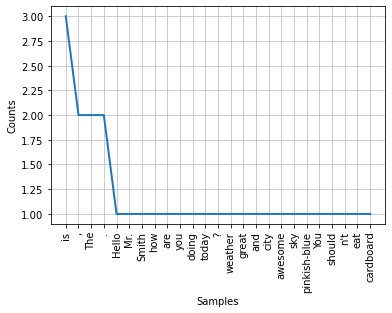

In [8]:
import matplotlib.pyplot as plt 
fdist.plot(30, cumulative= False)
plt.show()

### Stopwords 

Stopwords means a,an, this etc. In NLTK machine, we need to create a filter (stopwords list) and filter these words out of the tokenized words.

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words) # list of stopwords prebuilt in nltk

{'whom', 'with', 'didn', 'if', "didn't", 'out', 'had', 'each', 'below', 'what', 'yours', "wouldn't", 'am', 'they', 'me', 're', 'ours', 'those', 'does', 'why', 'shouldn', "shouldn't", "couldn't", "don't", 'any', 'how', "she's", 's', 'do', 'be', 'an', 'myself', 'itself', 'in', 'aren', 'hadn', 'o', 'doesn', 'down', 'should', 'our', 'shan', 'same', 'between', "aren't", 'wasn', 'these', 'above', 'too', 'up', "it's", 'just', 'having', 'to', 'are', 'nor', 'them', 'some', 'here', 'she', 'yourself', 'now', 'after', 'weren', 'through', 'all', 'his', 'being', 'doing', "hasn't", 'my', 'most', 'm', 'but', 'into', 'not', "mightn't", 'your', 'which', 'about', 'the', 'before', 'when', 'other', "doesn't", 'we', 'mightn', 'himself', 'or', 'don', 'd', "haven't", 'for', 'herself', 'theirs', 'mustn', 'was', 'themselves', "needn't", 'isn', "you'd", "weren't", "you'll", 'its', 'has', 'i', "you've", 'haven', 'it', 'that', 'couldn', 'there', 'very', 'as', 'while', 'only', 'against', 'at', 'ain', 'wouldn', "mus

### Removing Stopwords

Now we will keep only the words in our tokenized sentence without the stopwords.

In [17]:
filtered_word=  []

for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

print("Tokenized sentence:", tokenized_word)
print("Filtered Sentence:", filtered_word)



Tokenized sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

### Stemming 

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".


In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

stemmed_words = []

for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Words:", filtered_word)
print("stemmed word:", stemmed_words)

Filtered Words: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
stemmed word: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


### Lemmatization 

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized word", lem.lemmatize(word,"v"))
print("Stemmed Word", stem.stem(word))

Lemmatized word fly
Stemmed Word fli


### POS Tagging 

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [21]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens = nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [24]:
nltk.pos_tag(tokens) # grammatical group of given words 

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

### Sentiment Analysis

There are mainly two approaches for performing sentiment analysis.

Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

We will use the second approach.

Till now, we have done the preproceesing part. Now we wil do classification of movie reviews using Scikit Learn. 


In [1]:
import pandas as pd 
data = pd.read_csv("train.tsv", sep ='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


Sentiment Definition :

0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [4]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Most of the reviews were neutral.

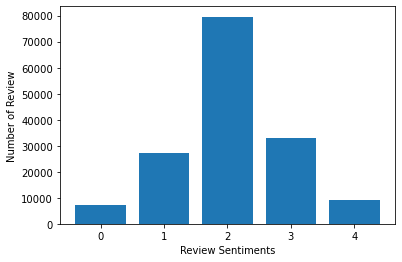

In [8]:
import matplotlib.pyplot as plt
Sentiment_count = data.groupby('Sentiment').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])

plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Feature Generation using Bag of words

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

We can generate document term matrix by using scikit-learn's CountVectorizer.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer removes unwanted elements like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer= token.tokenize)

text_counts = cv.fit_transform(data['Phrase'])# feature set

### Split Train and Test Set 



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.3, random_state = 1 )

### Model Building And Evaluation 

Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().


In [12]:
from sklearn.naive_bayes import MultinomialNB
# importing metrics module for accuracy 

from sklearn import metrics

#model generating using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)

print("Multinomial NB Accuracy : ", metrics.accuracy_score(y_test, predicted))

Multinomial NB Accuracy :  0.6049169122986885


We didnt get a good score. We will take below steps to improve this.

### Feature Generation using TF-IDF 

In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

text_tf = tf.fit_transform(data['Phrase'])

### Split train and test set (TF-IDF)

Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly. 

So we will insert our tf text into the model.


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf,data['Sentiment'],test_size=0.3, random_state=1)

### Model Building and Evaluation (TF-IDF)

Modelling time. First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5853090691614337


## Conclusion

We got a bad score again. But in this tutorial practice, we got many important fundamentals cracked. We will improvise next time. 